# 5. Declarative Induction

## Introduction
Declarative Induction technique is the one that works with human-readable representations, such as rules (Prollochs et al., 2019), trees (Voskarides et al., 2015), and programs (Ling et al., 2017) are induced as explanations.

## Experiments

In [2]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from src.preprocess import get_train_dev_test_data, tokenize
from transformers import AutoTokenizer
from sklearn import tree

In [4]:
train, dev, test = get_train_dev_test_data()
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-cased")

Generating train split: 103 examples [00:00, 16583.37 examples/s]


In [5]:
tokenized_train = tokenize(train, tokenizer)
y_train = tokenized_train['labels']
X_train = tokenized_train['input_ids']

In [6]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [7]:
class_names = ['negative', 'positive', 'neutral', 'mixed_feelings']
feature_names = ['pos_{i}' for i in range(len(tokenized_train['input_ids'][0]))]

[Text(0.5, 0.8333333333333334, 'pos_{i} <= 1295.5\ngini = 0.563\nsamples = 635\nvalue = [183, 156, 611, 46]\nclass = neutral'),
 Text(0.25, 0.5, 'pos_{i} <= 1528.5\ngini = 0.567\nsamples = 624\nvalue = [182, 156, 598, 45]\nclass = neutral'),
 Text(0.125, 0.16666666666666666, 'gini = 0.526\nsamples = 375\nvalue = [110, 84, 383, 15]\nclass = neutral'),
 Text(0.375, 0.16666666666666666, 'gini = 0.62\nsamples = 249\nvalue = [72, 72, 215, 30]\nclass = neutral'),
 Text(0.75, 0.5, 'pos_{i} <= 5477.0\ngini = 0.24\nsamples = 11\nvalue = [1, 0, 13, 1]\nclass = neutral'),
 Text(0.625, 0.16666666666666666, 'gini = 0.133\nsamples = 10\nvalue = [0, 0, 13, 1]\nclass = neutral'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]\nclass = negative')]

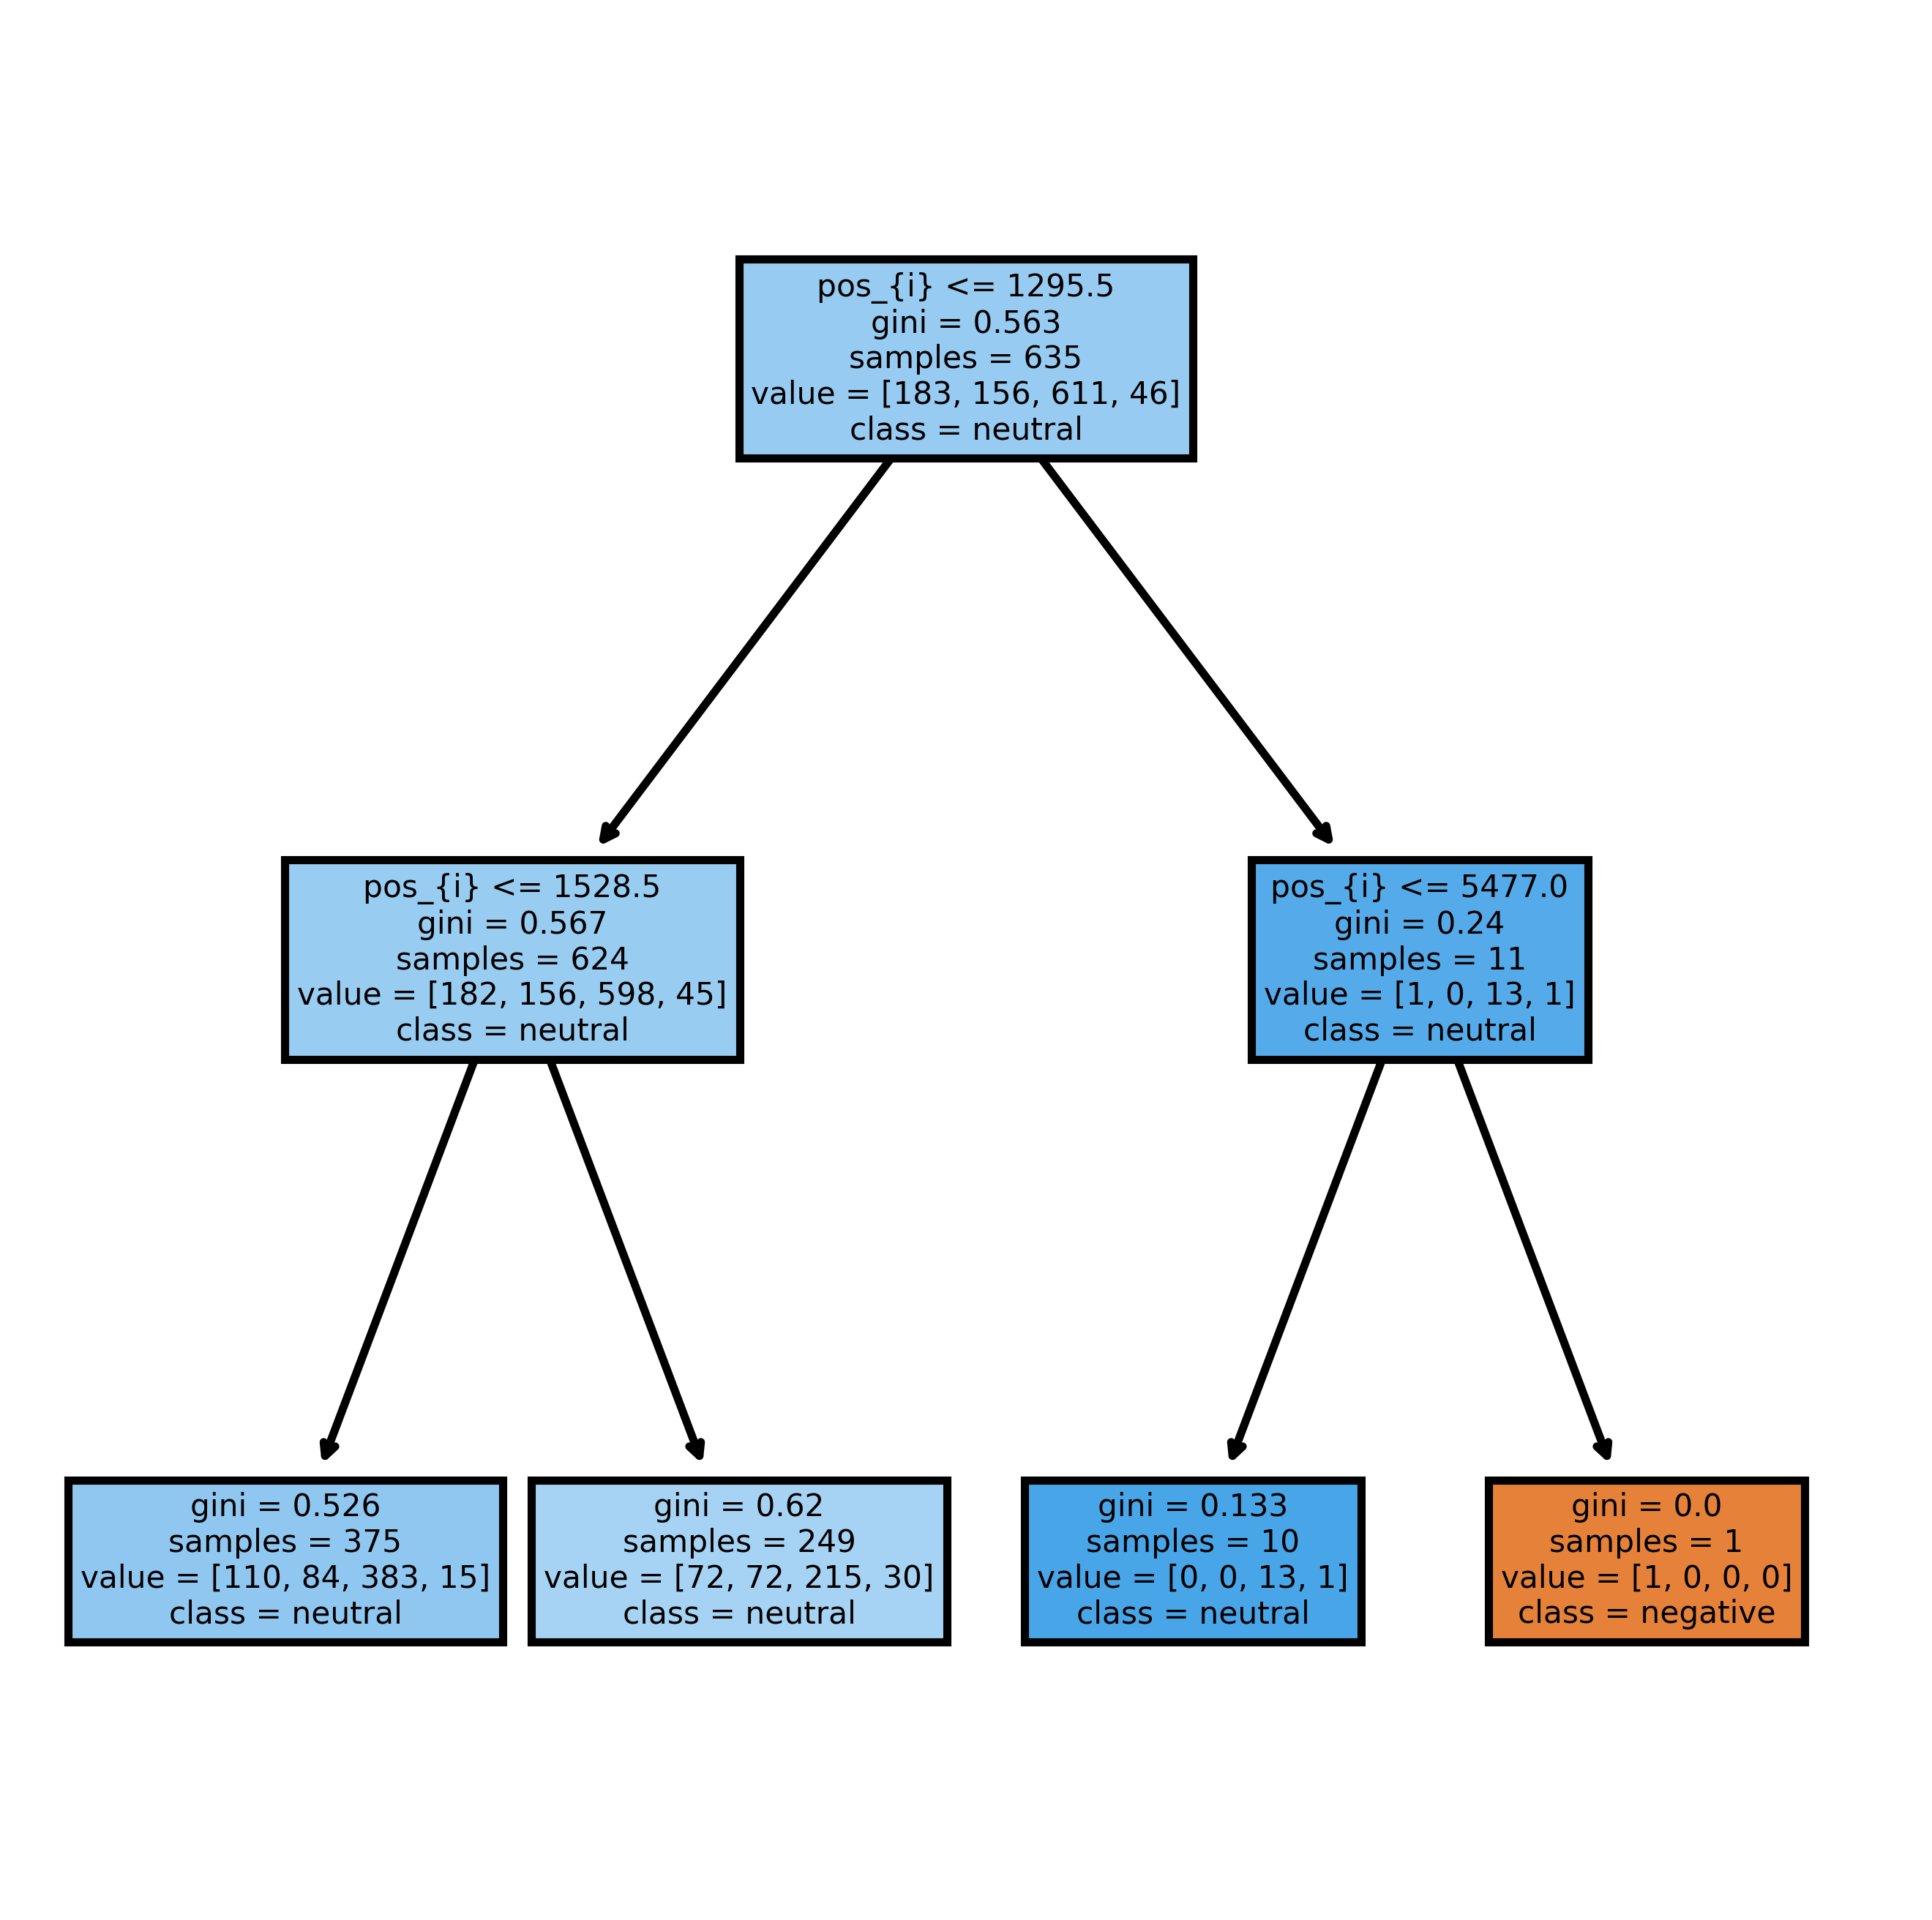

In [8]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(
    rf.estimators_[0],
    feature_names = feature_names, 
    class_names=class_names,
    filled = True
)

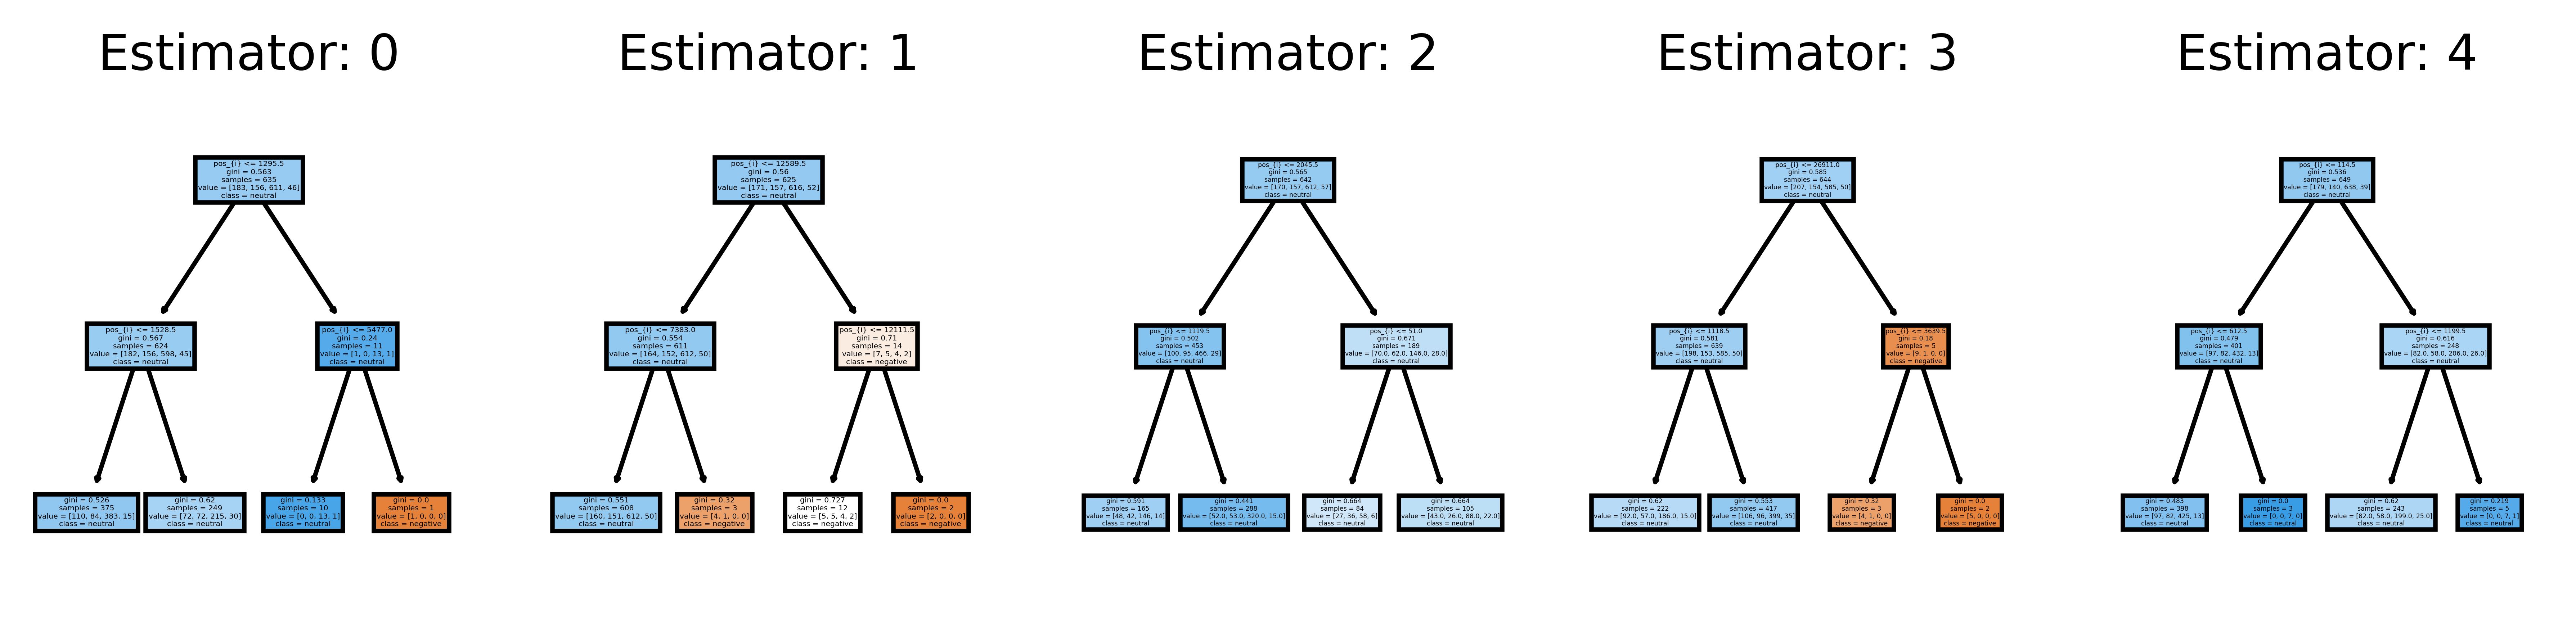

In [9]:
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = feature_names, 
                   class_names=class_names,
                   filled = True,
                   ax = axes[index]
    )

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

## Conclusions